## Classification on Iris Dataset 

In [2]:
# Initial Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load Data

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
df = pd.DataFrame(data=data.data, columns= data.feature_names)
df["target"] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### What probelem are we trying to solve?

From the attributes given for 3 species of flowers we are going to build a model that can predict the species from unseen data. This is a multi-class classification problem.

**NOTE:** The target names are ['setosa' 'versicolor' 'virginica'], which correspond to the labels 0, 1, and 2, respectively.

In [6]:
df['target'].unique()

array([0, 1, 2])

In [7]:
# Desciptive Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


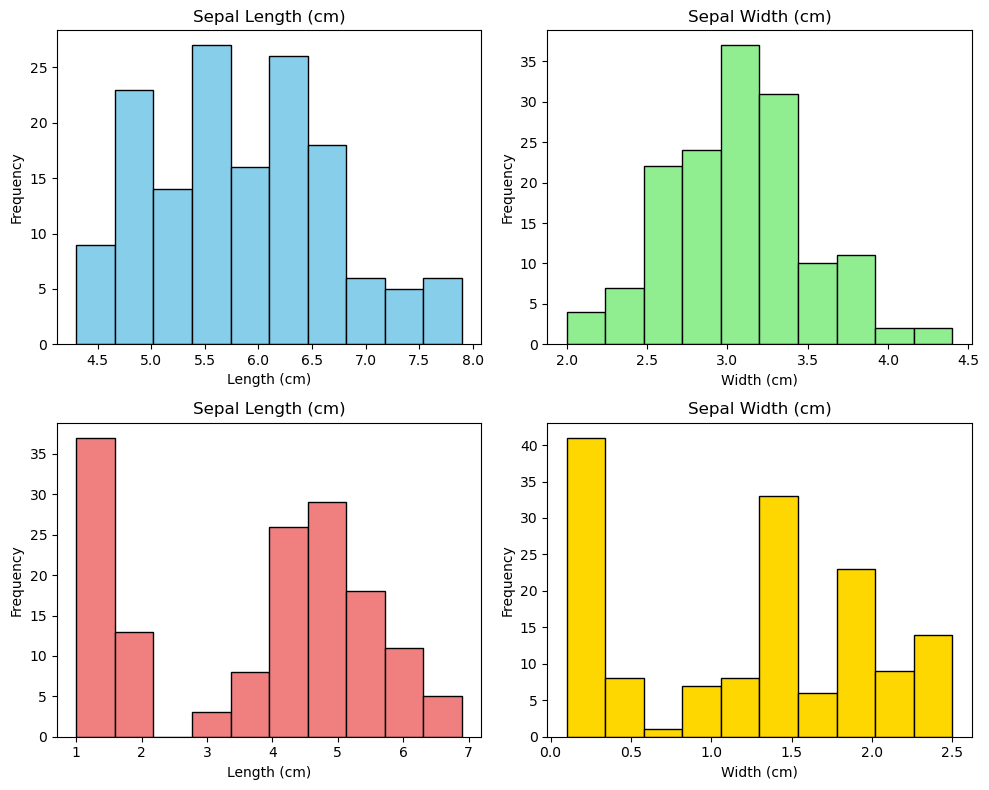

In [8]:
X = df.drop("target", axis=1)
y = df['target']

fig, axes = plt.subplots(2,2, figsize=(10, 8))

axes[0, 0].hist(X['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title("Sepal Length (cm)")
axes[0, 0].set_xlabel("Length (cm)")
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(X['sepal width (cm)'], bins=10, color='lightgreen', edgecolor='black')
axes[0, 1].set_title("Sepal Width (cm)")
axes[0, 1].set_xlabel("Width (cm)")
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(X['petal length (cm)'], bins=10, color='lightcoral', edgecolor='black')
axes[1, 0].set_title("Sepal Length (cm)")
axes[1, 0].set_xlabel("Length (cm)")
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(X['petal width (cm)'], bins=10, color='gold', edgecolor='black')
axes[1, 1].set_title("Sepal Width (cm)")
axes[1, 1].set_xlabel("Width (cm)")
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()


In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# df.drop('ColumNames', axis=1, inplace=True)

In [11]:
df['target_names'] = df['target'].map({0: "setosa", 1: "versicolor", 2: "virginica"})

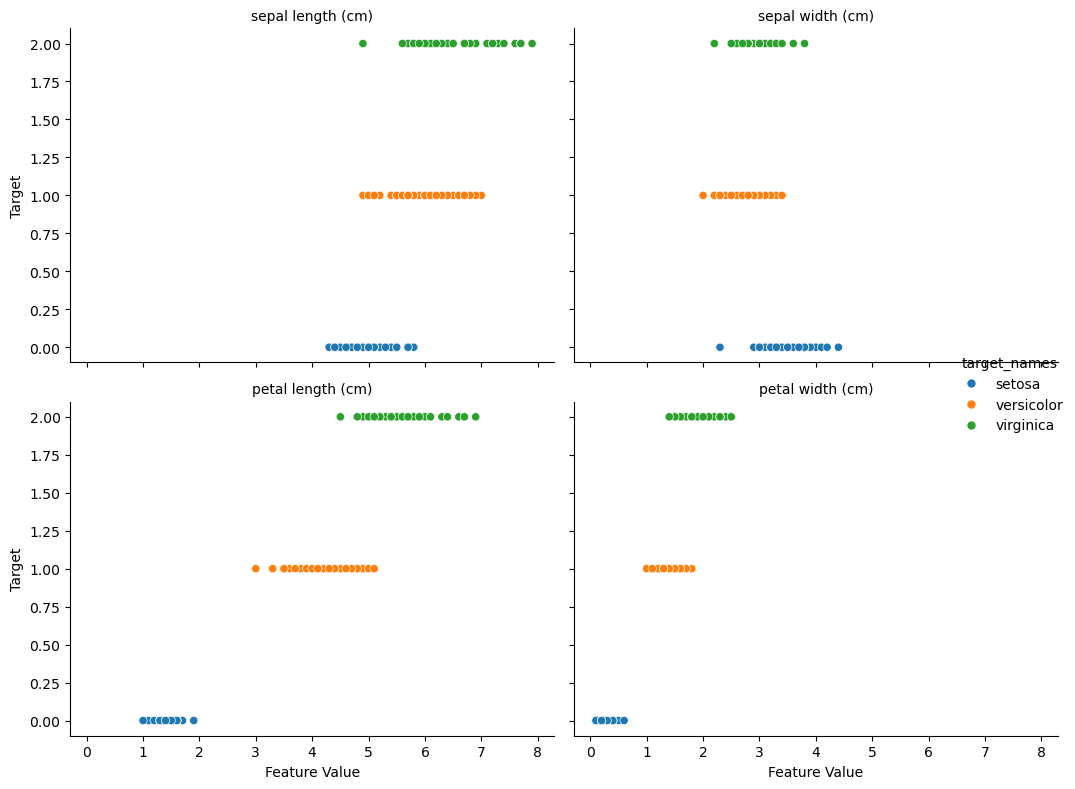

In [18]:
# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['target', 'target_names'], 
                    value_vars=data.feature_names,
                    var_name='Feature',
                    value_name='Value')

# Plot all features in one figure using FacetGrid
g = sns.relplot(
    data=df_melted,
    x='Value', y='target',
    hue='target_names',
    col='Feature',
    kind='scatter',
    col_wrap=2,  # Wrap the grid to fit 2 plots per row
    height=4, aspect=1.2
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Feature Value", "Target")
plt.tight_layout()
plt.show()


### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_train.shape

(112, 4)

In [21]:
y_train.shape

(112,)

### Modeling Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


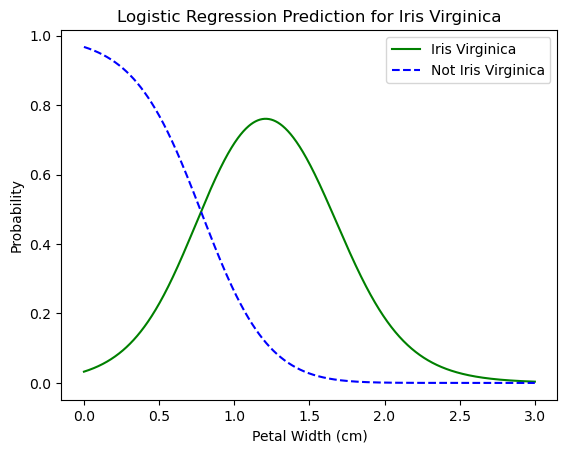

In [ ]:

X_train_new = df["petal width (cm)"].values.reshape(-1, 1)

log_reg= LogisticRegression()
log_reg.fit(X_train_new, y)

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)

plt.plot(X_new, y_prob[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label="Not Iris Virginica")
plt.show()